In [65]:
from sklearn.datasets import make_blobs

# import pandas
import pandas as pd
# import Kmeans 
from sklearn.cluster import KMeans
# import numpy
import numpy as np
# import matplotlib
import matplotlib.pyplot as plt


from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

# aglomerative clustering
from sklearn.cluster import AgglomerativeClustering
# cluster hierarchy
import scipy.cluster.hierarchy as sch

from pyclustertend import hopkins

# set figure size
plt.rcParams["figure.figsize"] = (12,8)

In [6]:
# Load dataframe
df = pd.read_csv('https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv')

In [9]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Objective: 

- Fit Hierarchical clustering, 
- find optimal number of clusters via dendrogram 
- and plot clusters. 

Again, to simplify plotting in 2-D, we can create clustering model based on the last two columns of the dataset only.

In [59]:
data = df.iloc[:,3:]
data_normal = normalize(data)

scaler = StandardScaler()
scaler.fit(data)
data_scaled = scaler.transform(data)


* define function plot_dendogram

In [52]:
def plot_dendrogram(x, method = 'ward'):
    dendrogram = sch.dendrogram(sch.linkage(x, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

* Plot dendrogram

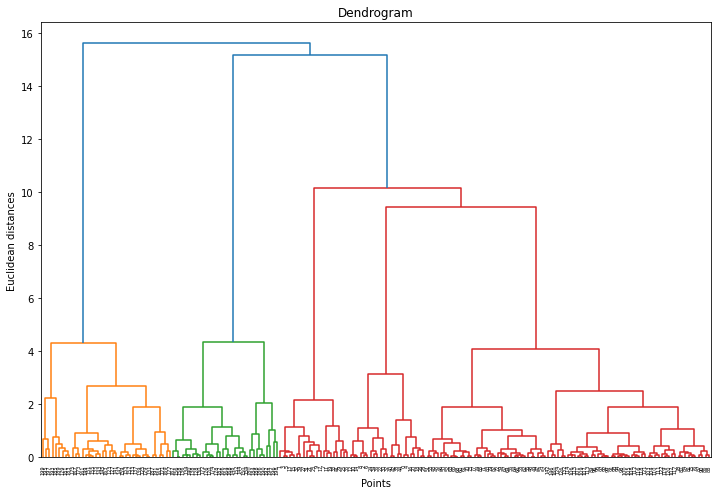

In [51]:
plot_dendrogram(data_scaled)

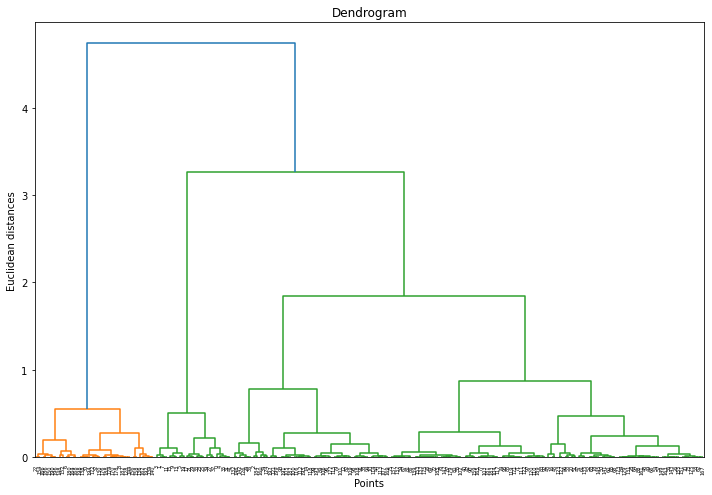

In [60]:
plot_dendrogram(data_normal)

* Fit Hierarchical clustering with optimal number of clusters

In [61]:
ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
y_scale = ac.fit_predict(data_scaled)
y_normal = ac.fit_predict(data_normal)

* define function plot_clusters

In [62]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

* Plot HC clusters

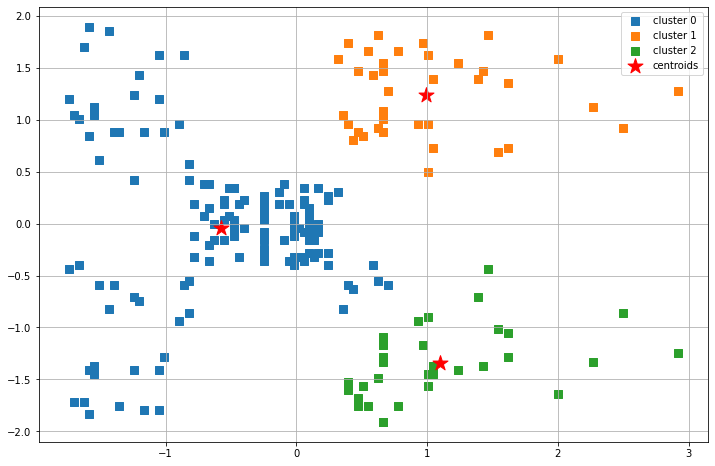

In [63]:
plot_clusters(data_scaled, y, True)

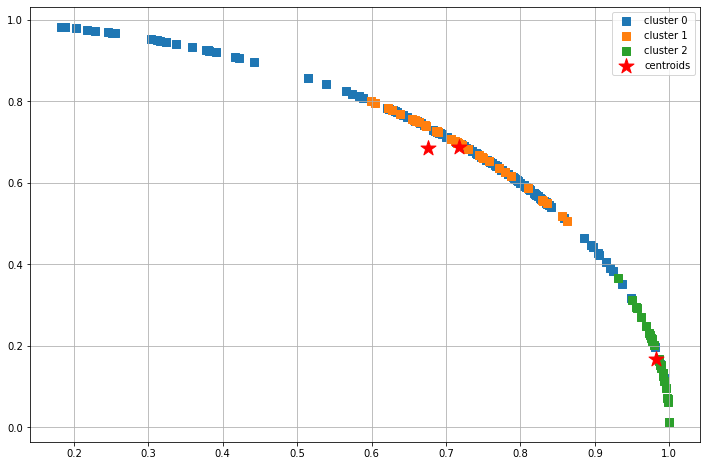

In [64]:
plot_clusters(data_normal, y, True)